In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import sncosmo
#import jp as sncosmo
import astropy.units as u
import glob
import numpy as np

csp = sncosmo.get_magsystem('csp')

salt2 = sncosmo.SALT2Source(modeldir=None, m0file='salt2_template_0.dat', m1file='salt2_template_1.dat', clfile='salt2_color_correction.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

#print(names)
for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    data['zp'] = 14.328
    #print(data['flux'])
    
    for i in range(0, len(data['flux'])):
        
        data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
        #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
        data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspb')
    
    #print(data['flux'])
    model = sncosmo.Model(source=salt2)
    #model.bandmag('cspb', 'csp')
    #model.set(z=0.0151)  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['z', 't0', 'x0', 'x1', 'c'], bounds={'z':(0, data['redshift'][0]+0.1)})
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    
    model2 = sncosmo.Model(source=salt2)
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['z', 't0', 'x0', 'x1', 'c'], bounds={'z':(teste['redshift'][0]-0.01, teste['redshift'][0]+0.01)})
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

SN2005hc_b.txt
SN2006D_b.txt
SN2005ki_b.txt
SN2004eo_b.txt
SN2008bc_b.txt
SN2004ef_b.txt
SN2007le_b.txt
SN2007bd_b.txt
SN2008gp_b.txt
SN2005M_b.txt
SN2005iq_b.txt
SN2006X_b.txt
SN2006et_b.txt
SN2008bf_b.txt
SN2006kf_b.txt
SN2009F_b.txt
SN2005el_b.txt
SN2006mr_b.txt
SN2008fp_b.txt
SN2007S_b.txt
SN2004ey_b.txt
SN2009aa_b.txt
SN2007on_b.txt
SN2005ke_b.txt
SN2006ax_b.txt
SN2006bh_b.txt
SN2005hk_b.txt
SN2007af_b.txt
SN2008hv_b.txt
SN2008hj_b.txt
SN2009D_b.txt
SN2005kc_b.txt
[0.2236788053512119, 4.864948528143128, 1.729353998506674, 3.6791030312942103, 0.7929490736545438, 0.6458064814520956, 1.3752918575971271, 0.9628972680635516, 0.43867258087588906, 0.5318824317926171, 0.18000844070013403, 3.341319206476842, 0.7343264289912941, 0.41025746354458154, 1.7890421697846388, 22.544292808673273, 2.25092841441051, 51.2193436698549, 3.944117914588603, 0.38010105699711905, 0.683354947646832, 0.5450999451495767, 113.91775064784088, 176.10292701488748, 0.9514232916228492, 0.5279206838218459, 23.9586626

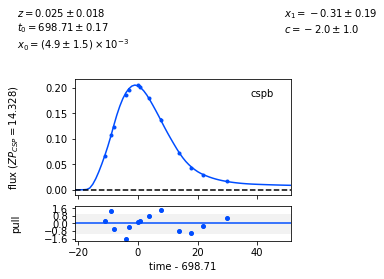

In [2]:
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp=14.328, zpsys='csp')
plt.show()

In [3]:
print(np.mean(chi_quad_ndof))
print(len(chi_quad_ndof))

13.297960813638117
32


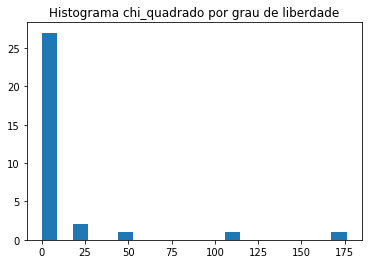

In [4]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grau de liberdade")
plt.show()

In [5]:
from __future__ import print_function
import matplotlib.pyplot as plt
#import sncosmo
import jp as sncosmo
import astropy.units as u
import glob
import numpy as np

par= sncosmo.SALT2Source(modeldir=None, m0file='M0.dat', m1file='M1.dat', m2file='M2.dat', cdfile='salt2_color_dispersion.dat', errscalefile='salt2_lc_dispersion_scaling.dat', lcrv00file='salt2_lc_relative_variance_0.dat', lcrv11file='salt2_lc_relative_variance_1.dat', lcrv01file='salt2_lc_relative_covariance_01.dat', name=None, version=None)
#ab = sncosmo.get_magsystem('ab')
chi_quad_ndof = []
names = glob.glob("*.txt")

for j in range(0, len(names)):
    #j = 4
    print(names[j])

    data = sncosmo.read_lc(names[j])
    data['zp'] = 14.328
    #print(data['flux'])
    
    for i in range(0, len(data['flux'])):
        
        data['fluxerr'][i] = 2*np.log(10)*(10**((data['zp'][i] - data['flux'][i])/2.5))*data['fluxerr'][i]/2.5 #flux error conversion
        #data['fluxerr'][i] = (2*np.log(10)/5)*10**(2*(data['zp'][i] - data['flux'][i])/5)*data['fluxerr'][i]
        
        data['flux'][i] = csp.band_mag_to_flux(data['flux'][i], 'cspb')
    
    #print(data['flux'])
    model = sncosmo.Model(source=par)
    #model.bandmag('cspb', 'csp')
    #model.set(z=0.0151)  # set the model's redshift
    
    result, fitted_model = sncosmo.fit_lc( data, model, ['z', 't0', 'x0', 'x1', 'x2'], bounds={'z':(0, data['redshift'][0]+0.1)})
               
    index = []
    
    for i in range(0,len(data['time'])):
        
        if data['time'][i] - result.parameters[1] > 50:
            
            index.append(i)
                
        if data['time'][i] - result.parameters[1] < -20:
            
            index.append(i)
        
        
    teste = np.delete(data, index , axis=0)           
    
    model2 = sncosmo.Model(source=par)
    
    result2, fitted_model2 = sncosmo.fit_lc(teste, model2, ['z', 't0', 'x0', 'x1', 'x2'], bounds={'z':(teste['redshift'][0]-0.01, teste['redshift'][0]+0.01)})
    
    
    chi_quad_ndof.append(result2.chisq/result2.ndof)
                
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()
print(chi_quad_ndof)
print(np.mean(chi_quad_ndof), np.std(chi_quad_ndof))
#sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)
#plt.show()

SN2005hc_b.txt
SN2006D_b.txt
SN2005ki_b.txt
SN2004eo_b.txt
SN2008bc_b.txt
SN2004ef_b.txt
SN2007le_b.txt
SN2007bd_b.txt
SN2008gp_b.txt
SN2005M_b.txt
SN2005iq_b.txt
SN2006X_b.txt
SN2006et_b.txt
SN2008bf_b.txt
SN2006kf_b.txt
SN2009F_b.txt
SN2005el_b.txt
SN2006mr_b.txt
SN2008fp_b.txt
SN2007S_b.txt
SN2004ey_b.txt
SN2009aa_b.txt
SN2007on_b.txt
SN2005ke_b.txt
SN2006ax_b.txt
SN2006bh_b.txt
SN2005hk_b.txt
SN2007af_b.txt
SN2008hv_b.txt
SN2008hj_b.txt
SN2009D_b.txt
SN2005kc_b.txt
[69.35453042550202, 421.3853610639051, 174.877708536755, 242.190844843257, 549.1336479056998, 102.2572993809843, 349.96623324644156, 106.03584068248016, 166.02344065119215, 108.49547244530817, 119.82996818760127, 164.27783252960273, 186.6380046336102, 310.01090846998875, 97.66015341236896, 13.333003425030824, 471.831442439536, 32.66736966125244, 40.2347256601651, 132.3037446315942, 304.8319222617408, 43.90248187140399, 314.1114569924856, 116.12719489482988, 152.75484104781597, 208.57140397667746, 125.58743820261527, 228.

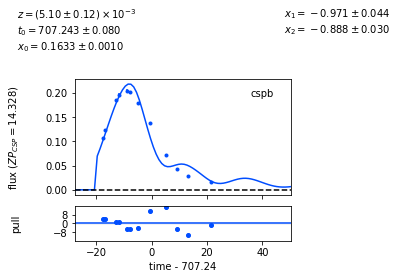

In [6]:
sncosmo.plot_lc(teste, model=fitted_model2, errors=result2.errors, zp=14.328, zpsys='csp')
plt.show()

In [7]:
np.mean(chi_quad_ndof)
len(chi_quad_ndof)

32

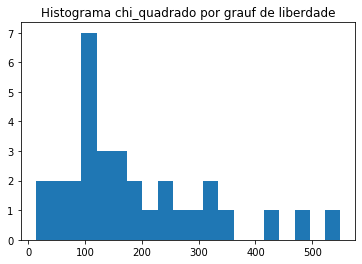

In [8]:
histograma = plt.hist(chi_quad_ndof, bins=20)
plt.title("Histograma chi_quadrado por grauf de liberdade")
plt.show()